In [2]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy.stats import norm

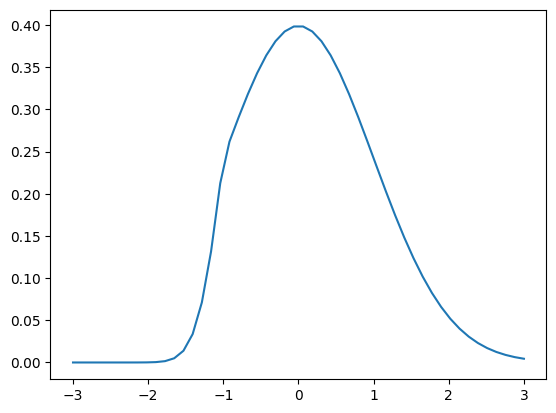

In [21]:
x = np.linspace(-3,3)
def a(x,b=-1):
    return np.where(x<b, (x-b)*3+b, (x-b)+b)
f = norm.pdf(a(x))
plt.plot(x,f)